QUESTION 1

In [6]:
import numpy as np
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [13]:
def linear_regression_gradient(X, y, theta):
    m = len(y)
    gradients = -2/m * X.T.dot(y - X.dot(theta))
    return gradients

def train_linear_regression(X, y, learning_rate=0.01, n_iterations=1000):
    X_b = np.c_[np.ones((len(X), 1)), X]
    theta = np.random.randn(X_b.shape[1], 1)

    for iteration in range(n_iterations):
        gradients = linear_regression_gradient(X_b, y, theta)
        theta = theta - learning_rate * gradients

    return theta

theta_linear = train_linear_regression(X, y)

In [62]:
def polynomial_regression_gradient(X, y, theta):
    m = len(y)
    # Calculate the difference and its absolute value
    diff = y - X.dot(theta)
    abs_diff = np.abs(diff)
    
    # Compute the gradient with respect to theta
    gradients = -7/m * X.T.dot(np.sign(diff) * np.power(abs_diff, 6))
    
    return gradients

def train_polynomial_regression(X, y, learning_rate=0.01, n_iterations=1000):
    X_poly = np.c_[np.ones((len(X), 1)), X, X**2, X**3, X**4, X**5, X**6, X**7]
    theta = np.random.randn(X_poly.shape[1], 1)
    mean_X = np.mean(X_poly)
    std_X = np.std(X_poly)
    X_poly = (X_poly - mean_X) / std_X
    X_poly /= 200

    for iteration in range(n_iterations):
        gradients = polynomial_regression_gradient(X_poly, y, theta)
        theta = theta - learning_rate * gradients

    return theta

theta_poly = train_polynomial_regression(X_normalized, y)

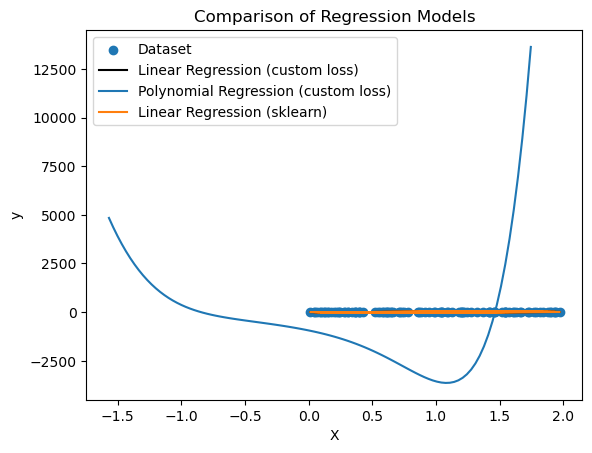

In [65]:
import matplotlib.pyplot as plt
X_new = np.linspace(min(X_normalized), max(X_normalized), 100).reshape(-1, 1)
X_new_poly = np.c_[np.ones((len(X_new), 1)), X_new, X_new**2, X_new**3, X_new**4, X_new**5, X_new**6, X_new**7]
y_new_poly = X_new_poly.dot(theta_poly)
plt.scatter(X, y, label='Dataset')
plt.plot(X, X.dot(theta_linear[1:]) + theta_linear[0], label='Linear Regression (custom loss)', color='black')
plt.plot(X_new, y_new_poly, label='Polynomial Regression (custom loss)')
plt.plot(X, linear_reg_sklearn.predict(X), label='Linear Regression (sklearn)')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Regression Models')
plt.show()


QUESTION 2

In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [140]:
df = pd.read_csv('AirQualityUCI.csv',sep = ';', decimal =',')